In [95]:
import pandas as pd                                         #data processing
import re                                                   #regular expression for data cleaning
from sklearn.feature_extraction.text import CountVectorizer #feature extraction
import nltk                                                 #natural language toolkit
from sklearn.linear_model import LogisticRegression  
from sklearn.model_selection import train_test_split 
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from nltk.corpus import stopwords  
import warnings

%matplotlib inline
warnings.filterwarnings("ignore")
pd.set_option("display.max_colwidth", 200)

In [19]:
data=pd.read_csv("tweets.csv")

In [20]:
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone
1,2,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/
2,3,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu
3,4,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/
4,5,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!


In [21]:
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [22]:
data= data.drop(['id'], axis=1)

In [23]:
data.head()

,label,tweet
0,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone
1,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/
2,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu
3,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/
4,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!


<AxesSubplot:>

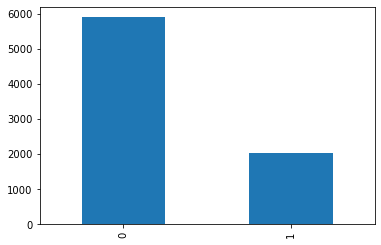

In [33]:
data['label'].value_counts().plot(kind='bar')

In [31]:
data['label'].value_counts(normalize=True)

0    0.744192
1    0.255808
Name: label, dtype: float64

In [36]:
newString=data.tweet[24]

In [44]:
newString= re.sub(r"'s\b", " is",data.tweet[24])

In [53]:
newString

"It's time for new wallpapers #phone #wallpapers #wall #screen #galaxy #samsung #app … "

In [52]:
newString= re.sub(r'http\S+', '', newString)

In [47]:
# make a dictionary of contractions
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}

In [92]:
#Removal of stop words

nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91996\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [96]:
stop_words=set(stopwords.words('english'))

In [56]:
# function to pre-process text
def tweet_cleaner(text):
    newString=re.sub(r'@[A-Za-z0-9]+','',text)                     #removing user mentions
    newString=re.sub("#","",newString)                             #removing hashtag symbol
    newString= ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in newString.split(" ")]) #contraction mapping
    newString= re.sub(r'http\S+', '', newString)                   #removing links
    newString= re.sub(r"'s\b","",newString)                        #removing 's
    letters_only = re.sub("[^a-zA-Z]", " ", newString)             #Fetching out only letters
    lower_case = letters_only.lower()                              #converting everything to lowercase
    words = lower_case.split()                                     #split based on space to remove multiple spaces                                
    return (" ".join(words)).strip()                               #combining to form sentence

In [57]:
# empty list to store the cleaned tweets
cleaned_tweets = []

for i in data.tweet:
  cleaned_tweets.append(tweet_cleaner(i))

print(cleaned_tweets[:5])   #print top 5 records

['fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone', 'finally a transparant silicon case thanks to my uncle yay sony xperia s sonyexperias', 'we love this would you go talk makememories unplug relax iphone smartphone wifi connect', 'i am wired i know i am george i was made that way iphone cute daventry home', 'what amazing service apple will not even talk to me about a question i have unless i pay them for their stupid support']


In [64]:
data['cleaned_tweets']=cleaned_tweets

In [66]:
data.head()

,label,tweet,cleaned_tweets
0,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone,fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone
1,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/,finally a transparant silicon case thanks to my uncle yay sony xperia s sonyexperias
2,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu,we love this would you go talk makememories unplug relax iphone smartphone wifi connect
3,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/,i am wired i know i am george i was made that way iphone cute daventry home
4,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!,what amazing service apple will not even talk to me about a question i have unless i pay them for their stupid support


In [73]:
vectorizer= CountVectorizer()
features=vectorizer.fit_transform(data['cleaned_tweets'])
features.shape

(7920, 16878)

In [88]:
features

<7920x16878 sparse matrix of type '<class 'numpy.int64'>'
	with 115232 stored elements in Compressed Sparse Row format>

In [81]:
x_train,x_test,y_train, test_y=train_test_split(features,data['label'],test_size=0.3, random_state=42)

#Understand features and label is used

In [84]:
lr=LogisticRegression()

lr.fit(x_train,y_train)

prediction=lr.predict(x_test)

f1_score(test_y,prediction)

0.7659235668789809

In [98]:

import spacy
nlp = spacy.load('en_core_web_sm')

w = nlp("trying")

w.lemma

AttributeError: 'spacy.tokens.doc.Doc' object has no attribute 'lemma'